In [1]:
import os
import pandas as pd

directory_path = '/Volumes/tcs_jf_fair_node_sampling/data/reports/graph_specs_dir'

dataframes_list = []

# Loop through each file in the directory
for file_name in os.listdir(directory_path):
    # Check if the file is a CSV file and matches the pattern we are looking for
    if file_name.startswith('pokec_') and file_name.endswith('_group_connect.csv'):
        # Construct full file path
        file_path = os.path.join(directory_path, file_name)
        # Read the CSV file and store it in a DataFrame
        df = pd.read_csv(file_path)
        # Add a column to identify the data from this particular file
        df['Experiment'] = file_name.replace('_group_connect.csv', '')
        # Append the DataFrame to our list
        dataframes_list.append(df)

# Combine all DataFrames into one large DataFrame
combined_df = pd.concat(dataframes_list, ignore_index=True)

# Move the 'Experiment' column to the front
cols = combined_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Experiment')))
combined_df = combined_df[cols]

# Save the combined DataFrame to a new CSV file
combined_csv_path = '/Volumes/tcs_jf_fair_node_sampling/data/reports/graph_specs_dir/combined_graphs_data.csv'
combined_df.to_csv(combined_csv_path, index=False)

# Display the path to the new CSV file, the column names, and the first few rows of the combined DataFrame
combined_csv_path, combined_df.columns.tolist(), combined_df.head()


('/Volumes/tcs_jf_fair_node_sampling/data/reports/graph_specs_dir/combined_graphs_data.csv',
 ['Experiment',
  'Unnamed: 0',
  'label_region_group_connections',
  'label_region_abs_connect_to_groups',
  'label_region_rel_connect_to_groups',
  'label_AGE_group_connections',
  'label_AGE_abs_connect_to_groups',
  'label_AGE_rel_connect_to_groups',
  'density',
  'n_nodes',
  'm_edges',
  'n_classes_attr',
  'nodes per attr abs',
  'nodes per attr rel',
  'n_classes_sens',
  'nodes per sens abs',
  'nodes per sens rel',
  'diameter',
  'radius',
  'avg_path_length',
  'clique_number'],
       Experiment  Unnamed: 0  \
 0  pokec_mixed_2           0   
 1  pokec_mixed_2           1   
 2  pokec_mixed_2           2   
 3  pokec_mixed_2           3   
 4  pokec_mixed_2           4   
 
                       label_region_group_connections  \
 0                  12175 (only innergroup connected)   
 1  4834 (connected innergoup and to one other group)   
 2  4471 (connected innergoup and to tw

In [2]:
import pandas as pd

# Load the combined CSV file
combined_csv_path = '/Volumes/tcs_jf_fair_node_sampling/data/reports/graph_specs_dir/combined_graphs_data.csv'
df = pd.read_csv(combined_csv_path)

# Print the column names to verify
print(df.columns)


Index(['Experiment', 'Unnamed: 0', 'label_region_group_connections',
       'label_region_abs_connect_to_groups',
       'label_region_rel_connect_to_groups', 'label_AGE_group_connections',
       'label_AGE_abs_connect_to_groups', 'label_AGE_rel_connect_to_groups',
       'density', 'n_nodes', 'm_edges', 'n_classes_attr', 'nodes per attr abs',
       'nodes per attr rel', 'n_classes_sens', 'nodes per sens abs',
       'nodes per sens rel', 'diameter', 'radius', 'avg_path_length',
       'clique_number'],
      dtype='object')


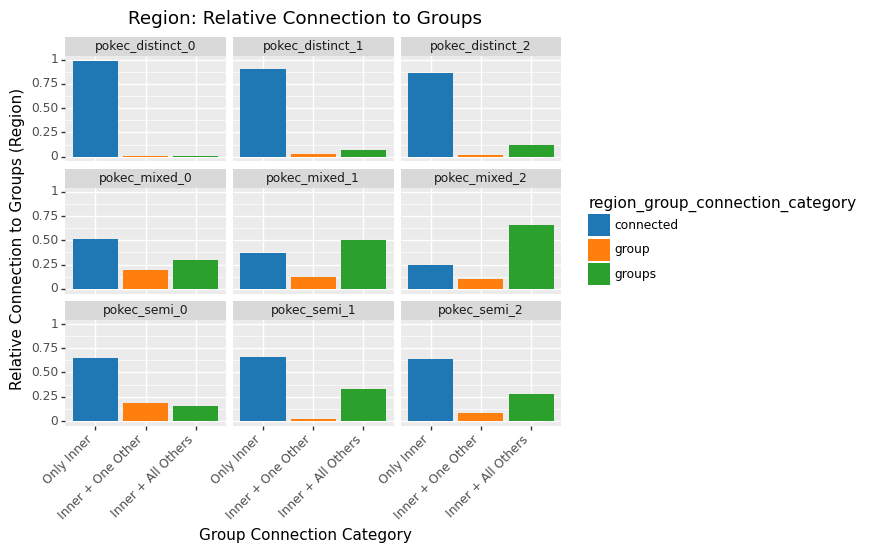

/Users/jf/.pyenv/versions/3.10.0/envs/arm_310thesis/lib/python3.10/site-packages/plotnine/layer.py:391: PlotnineWarning: position_stack : Removed 43 rows containing missing values.


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (3).

In [3]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, facet_wrap, labs, scale_fill_manual, scale_x_discrete, theme, element_text

# Load the CSV file
file_path = combined_csv_path  # Make sure this path is correct
df = pd.read_csv(file_path)

# Updated function to simplify category
def simplify_category(text):
    if pd.isna(text):
        return None
    category = text.split(' ')[-1].strip('()')
    if 'two' in category or 'three' in category or 'four' in category or 'five' in category:  # Add more conditions if needed
        return 'inner + all others'
    elif 'one' in category:
        return 'inner + one other'
    elif 'only' in category:
        return 'only inner'
    return category

# Apply the function to the relevant columns
df['region_group_connection_category'] = df['label_region_group_connections'].apply(simplify_category)
df['AGE_group_connection_category'] = df['label_AGE_group_connections'].apply(simplify_category)

# Define color palette
color_palette = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Manually set x-axis labels
x_labels = ['Only Inner', 'Inner + One Other', 'Inner + All Others']

# Plot for label_region_rel_connect_to_groups
plot_region = (
    ggplot(df, aes(x='region_group_connection_category', y='label_region_rel_connect_to_groups', fill='region_group_connection_category')) +
    geom_bar(stat='identity') +
    facet_wrap('~Experiment') +
    labs(title='Region: Relative Connection to Groups',
         x='Group Connection Category',
         y='Relative Connection to Groups (Region)') +
    scale_fill_manual(values=color_palette) +
    scale_x_discrete(labels=x_labels) +
    theme(axis_text_x=element_text(rotation=45, hjust=1) +  # Rotate x-axis labels for better fit
    guides(fill=guide_legend(title="Group Connection"))  # Adjust legend title
)

# Plot for label_AGE_rel_connect_to_groups
plot_age = (
    ggplot(df, aes(x='AGE_group_connection_category', y='label_AGE_rel_connect_to_groups', fill='AGE_group_connection_category')) +
    geom_bar(stat='identity') +
    facet_wrap('~Experiment') +
    labs(title='Age: Relative Connection to Groups',
         x='Group Connection Category',
         y='Relative Connection to Groups (Age)') +
    scale_fill_manual(values=color_palette) +
    scale_x_discrete(labels=x_labels) +
    theme(axis_text_x=element_text(rotation=45, hjust=1)) +
    guides(fill=guide_legend(title="Group Connection"))  # Adjust legend title
) # Rotate x-axis labels for better fit
)

# Display or save the plots as needed
print(plot_region)
print(plot_age)
